In [1]:
#import libraries
import pandas as pd
import numpy as np
import string
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#reading in data
train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [3]:
#check first few rows
train.head(7)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
#data Cleaning tasks
#1. remove @user handles
#2. remomve words with less than or equal to 3 letters
#3. remove special character and punctuations
#4. do stemming or lemmatizations

In [6]:
#1. remove @user handle

In [7]:
#combine both train and test to ease our task
combi = train.append(test, ignore_index = True)

In [8]:
#function that removes a pattern form an input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'', input_txt)
        
    return input_txt

In [9]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")

In [10]:
#remove special character, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")

In [11]:
combi.tail(5)

,id,label,tweet,tidy_tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio omg am...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads...
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ...",my song so glad free download #shoegaze ...


In [12]:
#remove short words
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [13]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [14]:
#Tokenization
tokenized_tweet = combi['tidy_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [15]:
#Stemming
from nltk import PorterStemmer
ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(w) for w in x])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [16]:
#visualizing the data


In [17]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


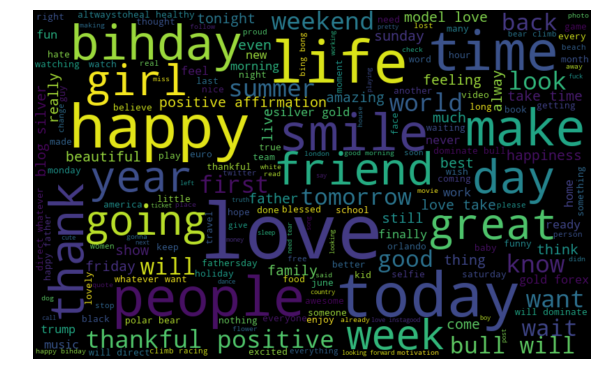

In [18]:
#most common words
all_words = ' '.join([w for w in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

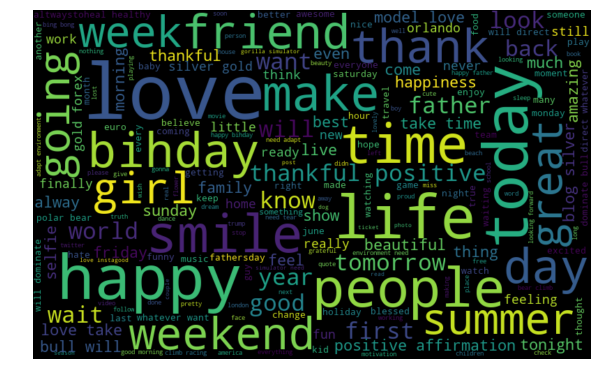

In [29]:
#words in non-racist/non-sexist tweets
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==0]])
normalwordslist = normal_words.split()
wordcloud = WordCloud(width=800,height=500,max_font_size=110).generate(normal_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()


In [32]:
normalwordslist

['when',
 'father',
 'dysfunctional',
 'selfish',
 'drags',
 'kids',
 'into',
 'dysfunction',
 '#run',
 'thanks',
 '#lyft',
 'credit',
 'cause',
 'they',
 'offer',
 'wheelchair',
 'vans',
 '#disapointed',
 '#getthanked',
 'bihday',
 'your',
 'majesty',
 '#model',
 'love',
 'take',
 'with',
 'time',
 'factsguide',
 'society',
 '#motivation',
 'huge',
 'fare',
 'talking',
 'before',
 'they',
 'leave',
 'chaos',
 'disputes',
 'when',
 'they',
 'there',
 '#allshowandnogo',
 'camping',
 'tomorrow',
 'danny',
 'next',
 'school',
 'year',
 'year',
 'exams',
 'think',
 'about',
 'that',
 '#school',
 '#exams',
 '#hate',
 '#imagine',
 '#actorslife',
 '#revolutionschool',
 '#girl',
 'love',
 'land',
 '#allin',
 '#cavs',
 '#champions',
 '#cleveland',
 '#clevelandcavaliers',
 'welcome',
 'here',
 '#ireland',
 'consumer',
 'price',
 'index',
 'climbed',
 'from',
 'previous',
 '#blog',
 '#silver',
 '#gold',
 '#forex',
 'selfish',
 '#orlando',
 '#standwithorlando',
 '#pulseshooting',
 '#orlandoshootin

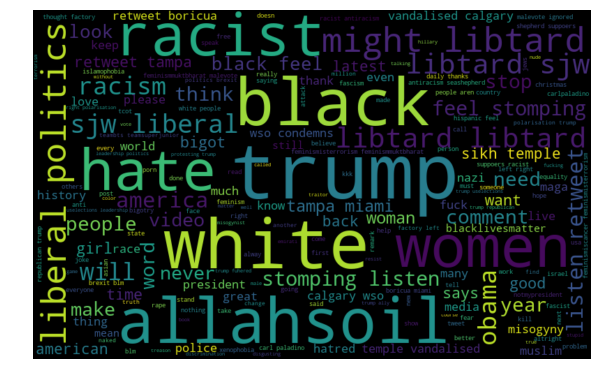

In [33]:
#words in racist/sexist tweets
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==1]])
negativewordslist = negative_words.split()
wordcloud = WordCloud(width=800,height=500,max_font_size=110).generate(negative_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()


In [34]:
negativewordslist

['#cnn',
 'calls',
 '#michigan',
 'middle',
 'school',
 'build',
 'wall',
 'chant',
 '#tcot',
 'comment',
 '#australia',
 '#opkillingbay',
 '#seashepherd',
 '#helpcovedolphins',
 '#thecove',
 '#helpcovedolphins',
 'retweet',
 'agree',
 'lumpy',
 'says',
 'prove',
 'lumpy',
 'unbelievable',
 'that',
 'century',
 'need',
 'something',
 'like',
 'this',
 'again',
 '#neverump',
 '#xenophobia',
 'lets',
 'fight',
 'against',
 '#love',
 '#peace',
 'white',
 'establishment',
 'have',
 'folx',
 'running',
 'around',
 'loving',
 'themselves',
 'promoting',
 'greatness',
 'white',
 'people',
 'call',
 'people',
 'white',
 '#race',
 '#identity',
 '#med',
 '#altright',
 'uses',
 'insecurity',
 'lure',
 'into',
 '#whitesupremacy',
 'interested',
 '#linguistics',
 'that',
 'doesn',
 'address',
 '#race',
 'racism',
 'about',
 '#power',
 '#raciolinguistics',
 'brings',
 'mocked',
 'obama',
 'being',
 'black',
 '#brexit',
 '#people',
 'aren',
 'protesting',
 '#trump',
 'because',
 '#republican',
 'they

In [37]:
poswords = set(normalwordslist) - set(negativewordslist)

In [43]:
poswords = list(poswords)

In [44]:
negwords = set(negativewordslist) - set(normalwordslist)

In [46]:
negwords = list(negwords)

In [48]:
#find trending hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    
    return hashtags

In [49]:
#hashtags from regular tweets:
ht_regular = hashtag_extract(combi['tidy_tweet'][combi['label']==0])

In [50]:
#hashtags from sexist tweets
ht_negative = hashtag_extract(combi['tidy_tweet'][combi['label']==1])

In [51]:
ht_regular

[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 ['model'],
 ['motivation'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'love'],
 ['gettingfed'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thankful', 'positive'],
 ['friday', 'cookies'],
 [],
 ['euro'],
 ['badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssas', 'love'],
 ['smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian'],
 [],
 ['goodnight', 'badm

In [52]:
#unnesting list .... //?????
ht_regular = sum(ht_regular,[])
ht_negative = sum(ht_negative,[])

In [54]:
ht_regular

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 'gettingfed',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ri

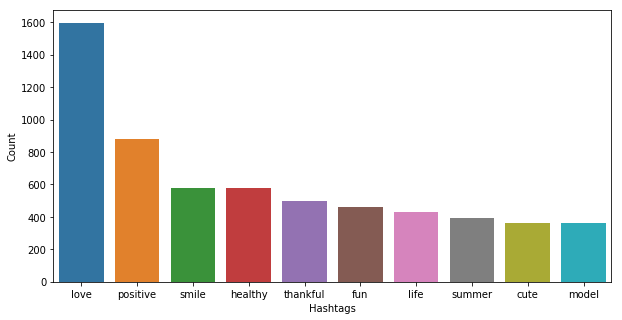

In [59]:
#plot the top hashtags for regular tweets
a = nltk.FreqDist(ht_regular)
d = pd.DataFrame({
                'Hashtags':list(a.keys()),
                'Count':list(a.values())
                 })
#selecting top 10 most freq hashtags
d = d.nlargest(columns = "Count", n= 10)
plt.figure(figsize = (10,5))
ax = sns.barplot(data = d,x = "Hashtags", y = "Count")

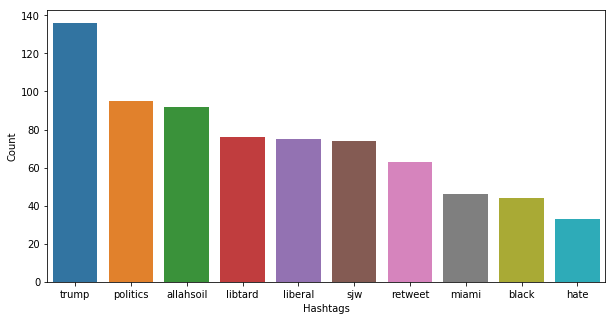

In [123]:
#plot the top hashtags for racist tweets
a = nltk.FreqDist(ht_negative)
d = pd.DataFrame({
                'Hashtags':list(a.keys()),
                'Count':list(a.values())
                 })
#selecting top 10 most freq hashtags
d = d.nlargest(columns = "Count", n= 10)
plt.figure(figsize = (10,5))
ax = sns.barplot(data = d,x = "Hashtags", y = "Count")

In [124]:
#Extracting Features

In [125]:
#1. Using Count Vectoriser

In [126]:
from sklearn.feature_extraction.text import CountVectorizer
countvect = CountVectorizer(max_df=0.9, min_df=2, max_features=1000, stop_words='english')
countvectmodel = countvect.fit_transform(combi['tidy_tweet'])

In [127]:
def countpos(text):
    count = len(set(poswords).intersection(set(text)))
    return count

def countneg(text):
    count = len(set(negwords).intersection(set(text)))
    return count

def counthtpos(text):
    count = len(set(ht_regular).intersection(set(text)))
    return count

def counthtneg(text):
    count = len(set(ht_negative).intersection(set(text)))
    return count


combi['poscount'] = combi['tidy_tweet'].apply(lambda x:countpos(x.split()))
combi['negcount'] = combi['tidy_tweet'].apply(lambda x:countneg(x.split()))
combi['poshtcount'] = combi['tidy_tweet'].apply(lambda x:counthtpos(x.split()))
combi['neghtcount'] = combi['tidy_tweet'].apply(lambda x:counthtneg(x.split()))

X_count_feat = pd.concat([combi['poscount'],combi['negcount'],combi['poshtcount'],combi['neghtcount'], pd.DataFrame(countvectmodel.toarray())], axis =1)
X_count_feat.head()

,poscount,negcount,poshtcount,neghtcount,0,1,2,3,4,5,...,990,991,992,993,994,995,996,997,998,999
0,5,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
X_count_feat.tail()

,poscount,negcount,poshtcount,neghtcount,0,1,2,3,4,5,...,990,991,992,993,994,995,996,997,998,999
49154,0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,3,0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,1,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,4,0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49158,3,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#set(combi['tidy_tweet'][0].split()).intersection(ht_regular)

In [65]:
#2. Using tf-idf method

In [130]:
#X_count_feat

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvect = TfidfVectorizer(max_df=0.9, min_df=2, max_features=1000, stop_words='english')
tfidfmodel = tfidfvect.fit_transform(combi['tidy_tweet'])

In [139]:
X_tfidf_feat = pd.concat([combi['poscount'],combi['negcount'],combi['poshtcount'],combi['neghtcount'], pd.DataFrame(tfidfmodel.toarray())], axis =1)
X_tfidf_feat.head()

,poscount,negcount,poshtcount,neghtcount,0,1,2,3,4,5,...,990,991,992,993,994,995,996,997,998,999
0,5,0,5,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,0,6,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#Build Model #A, using count vect

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [140]:
countvectmodel

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 163536 stored elements in Compressed Sparse Row format>

In [145]:
traincountvect = X_count_feat[:31962]
testcountvect = X_count_feat[31962:]

MemoryError: 

In [ ]:
trainco

In [144]:
traincountvect = X_count[:31962,:]
testcountvect = countvectmodel[31962:,:]

NameError: name 'X_count' is not defined

In [106]:
X_train, X_test, y_train, y_test = train_test_split(traincountvect, train['label'], random_state= 161, test_size = 0.15)

In [107]:
#training model
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [108]:
y_pred = lreg.predict_proba(X_test)
pred_int = y_pred[:,1] >= 0.3 #........if prediction >0.3, then 1, else 0
pred_int = pred_int.astype(np.int)

In [109]:
f1_score(y_test,pred_int)

0.5563636363636364

In [110]:
#testing on actual test data

In [111]:
test_pred = lreg.predict_proba(testcountvect)
test_pred_int = test_pred[:,1]>=0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('submission1cv.csv', index=False)

In [112]:
#Build Model #A, using tfidf

In [113]:
train_tfidf = tfidfmodel[:31962,:]
test_tfidf = tfidfmodel[31962:,:]

In [114]:
X_train_tfidf = train_tfidf[y_train.index]
X_test_tfidf = train_tfidf[y_test.index]

In [115]:
lreg.fit(X_train_tfidf, y_train)

prediction = lreg.predict_proba(X_test_tfidf)
prediction_int = prediction[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)

f1_score(y_test,prediction_int) 

0.5576208178438663

In [116]:
test_pred = lreg.predict_proba(test_tfidf)
test_pred_int = test_pred[:,1]>=0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('submission1tfidf.csv', index=False)

In [ ]:
def countpos(text):
    count = sum([1 for char in text if char in poswords])
    return count

In [84]:
a = ['hello','my','name','is','shubham']

In [89]:
b = ['shubham','is','a' ,'good','boy']

In [95]:
 count = [char for char in b if char in a]

In [96]:
count

['shubham', 'is']